# Global Entrepreneurship Monitor (GEM)

## Entrepreneurial Behavior and Attitudes
The Adult Population Survey (APS) looks at the characteristics, motivations and ambitions of individuals starting businesses, as well as social attitudes towards entrepreneurship.

### Definitions
Entrepreneurial Behaviour and Attitudes indicators measured via the Adult Population Survey (APS):

- **Total early-stage Entrepreneurial Activity (TEA) Rate**: Percentage of 18-64 population who are either a nascent entrepreneur or owner-manager of a new business

- **Motivational Index**: Percentage of those involved in TEA that are improvement-driven opportunity motivated, divided by the percentage of TEA that is necessity-motivated

- **Female/Male TEA Ratio**: Percentage of female 18-64 population who are either a nascent entrepreneur or owner-manager of a 'new business', divided by the equivalent percentage for their male counterparts

- **Female/Male Opportunity-Driven TEA Ratio**: Percentage of those females involved in TEA who (i) claim to be driven by opportunity as opposed to finding no other option for work; and (ii) who indicate the main driver for being involved in this opportunity is being independent or increasing their income, rather than just maintaining their income, divided by the equivalent percentage for their male counterparts

- **High Job Creation Expectation Rate**: Percentage of those involved in TEA who expect to create 6 or more jobs in 5 years

- **Innovation Rate**: Percentage of those involved in TEA who indicate that their product or service is new to at least some customers AND that few/no businesses offer the same product

- **Business Services Sector Rate**: Percentage of those involved in TEA in the 'Business Services' sector - Information and Communication, Financial Intermediation and Real Estate, Professional Services or Administrative Services, as defined by the ISIC 4.0 Business Type Codebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('../data/GEM/GEM 2017 APS Global National Level Data_27Oct.xlsx')

In [3]:
df.shape

(54, 194)

In [4]:
df.head(3)

,country,country_name,region,ctryalp,CAT_GCR1,CAT_GCR2,Bstart17,Bjobst17,Ownmge17,Busang17,...,TEAexpwk,BAFUNDUS,COUNTBAF,COUNTBUS,BUSANGVL,BUSANGVLWT,IPACTLD_ALL,IPACTLD_EMP,IPACTLDNOW_ALL,IPACTLDNOW_EMP
0,1,USA,North America,US,5,3,16.484463,8.929930,19.643626,6.740430,...,86.441637,20243.118280,93,95,5.230596,5.257400,7.587636,10.977426,6.341433,9.174480
1,20,Egypt,Africa,EG,3,2,30.558540,21.104014,16.698833,3.766109,...,30.520236,5090.341288,88,88,3.490678,3.549859,2.176354,4.434803,1.695146,3.454236
2,27,South Africa,Africa,ZA,3,2,16.908842,7.316289,10.483170,2.747753,...,62.537307,1610.132465,47,52,1.584507,1.476898,0.453279,1.276094,0.328499,0.917118


In [5]:
list(df.columns)

['country',
 'country_name',
 'region',
 'ctryalp',
 'CAT_GCR1',
 'CAT_GCR2',
 'Bstart17',
 'Bjobst17',
 'Ownmge17',
 'Busang17',
 'Futsup17',
 'Disent17',
 'Exitct17',
 'Knoent17',
 'Opport17',
 'Suskil17',
 'Frfail17',
 'Knoen17m',
 'Knoen17f',
 'Oppor17m',
 'Oppor17f',
 'Suskl17m',
 'Suskl17f',
 'Ffail17m',
 'Ffail17f',
 'Equali17',
 'NBgood17',
 'NBstat17',
 'NBmedi17',
 'Sub17',
 'Subo17',
 'Suboa17',
 'Suboan17',
 'Babybu17',
 'Estbbu17',
 'Anybus17',
 'BO_17ina',
 'BO_17exa',
 'TEA17',
 'TEA17mal',
 'TEA17fem',
 'EB_17mal',
 'EB_17fem',
 'TEA17opp',
 'TEA17nec',
 'TEA17mop',
 'TEA17fop',
 'TEA17mne',
 'TEA17fne',
 'TEA17ido',
 'TEA17MT1',
 'TEA17MT2',
 'TEA17MT3',
 'TEA17MT4',
 'SUBOPP17',
 'SUBNEC17',
 'Sample17',
 'SU_ct17',
 'BB_ct17',
 'EB_ct17',
 'TEAct17',
 'BA_ct17',
 'DISCct17',
 'SU_17tmz',
 'BB_17tmz',
 'EB_17tmz',
 'TEA17tmz',
 'Tea17s1p',
 'Tea17s2p',
 'Tea17s3p',
 'Tea17s4p',
 'EB_17s1p',
 'EB_17s2p',
 'EB_17s3p',
 'EB_17s4p',
 'TEA17mk1',
 'TEA17mk2',
 'TEA17mk3',


In [6]:
selected_cols = [
    'TEA17mal', 'TEA17fem', #'TEA17', 
    'TEA17mop', 'TEA17fop', #'TEA17opp',
    'TEA17mne', 'TEA17fne', #'TEA17nec',
    #...
]

`CAT_GCR1` is Country Group Global Competitiveness Report 5 categories, where countries with higher score are also in catgeory 5.

In [7]:
for i in range(1,6):
    print(i, list(df[df['CAT_GCR1']==i]['country_name']))

1 ['India', 'Madagascar']
2 ['Vietnam', 'Kazakhstan']
3 ['Egypt', 'South Africa', 'Peru', 'Mexico', 'Brazil', 'Colombia', 'Indonesia', 'Thailand', 'China', 'Iran', 'Morocco', 'Bulgaria', 'Bosnia and Herzegovina', 'Guatemala', 'Ecuador']
4 ['Poland', 'Argentina', 'Chile', 'Malaysia', 'Latvia', 'Croatia', 'Slovakia', 'Panama', 'Uruguay', 'Lebanon', 'Saudi Arabia']
5 ['USA', 'Greece', 'Netherlands', 'France', 'Spain', 'Italy', 'Switzerland', 'United Kingdom', 'Sweden', 'Germany', 'Australia', 'Japan', 'Korea', 'Canada', 'Luxembourg', 'Ireland', 'Cyprus', 'Estonia', 'Slovenia', 'Puerto Rico', 'Taiwan', 'United Arab Emirates', 'Israel', 'Qatar']


`region` is a column I manually added for analysis purpose.

Australia and Sweden is grouped in `Western Europe`, Mexico is grouped along with Central American countries to `South America`, Kazakhstan and India are not in a group name because there is only one country in their region, and China is also singled out because it has a different sociopolitical structure than rest of East Asia and also because it has a much lower GCR.

In [8]:
df['region'].value_counts()

South America      11
Western Europe      9
Eastern Europe      8
Middle East         7
Southeast Asia      4
Africa              4
East Asia           3
Southern Europe     3
North America       2
China               1
India               1
Kazakhstan          1
Name: region, dtype: int64

In [9]:
selected_df = df[['country_name', 'region', 'CAT_GCR1'] + selected_cols]

## by Global Competitiveness Report

In [10]:
selected_groupby = selected_df.groupby('CAT_GCR1').mean()
selected_groupby

,TEA17mal,TEA17fem,TEA17mop,TEA17fop,TEA17mne,TEA17fne
CAT_GCR1,,,,,,
1,16.620067,14.389764,10.844584,9.650432,4.830026,3.441385
2,16.545528,18.020792,13.312790,14.120860,2.607961,3.099657
3,16.825942,13.213375,12.304000,8.772533,4.228129,4.226240
4,17.088642,12.326207,13.082533,8.562678,3.665436,3.504701
5,11.290139,7.091969,8.969509,5.387492,1.855005,1.296945


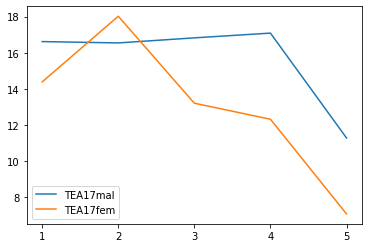

In [12]:
TEA_cols = ['TEA17mal', 'TEA17fem']
plt.plot(selected_groupby[TEA_cols])
plt.legend(TEA_cols)
plt.xticks(np.arange(1,6))
plt.show()

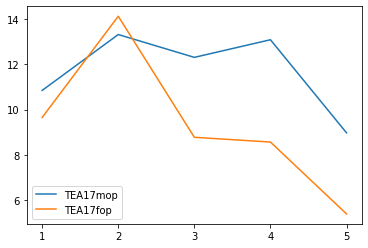

In [13]:
OP_cols = ['TEA17mop', 'TEA17fop']
plt.plot(selected_groupby[OP_cols])
plt.legend(OP_cols)
plt.xticks(np.arange(1,6))
plt.show()

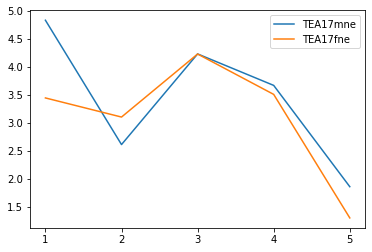

In [14]:
NE_cols = ['TEA17mne', 'TEA17fne']
plt.plot(selected_groupby[NE_cols])
plt.legend(NE_cols)
plt.xticks(np.arange(1,6))
plt.show()

## by region

In [15]:
selected_groupby_region = selected_df.groupby('region').mean().sort_values(by='CAT_GCR1')
selected_groupby_region

,CAT_GCR1,TEA17mal,TEA17fem,TEA17mop,TEA17fop,TEA17mne,TEA17fne
region,,,,,,,
India,1.000000,10.290052,8.220669,5.114034,2.063614,3.595120,3.568139
Kazakhstan,2.000000,11.362801,11.271963,7.752988,7.971575,2.360258,1.699837
Africa,2.500000,16.926230,10.456018,12.046862,7.484557,4.621606,2.889160
China,3.000000,10.536183,9.185451,6.672659,6.353213,3.653948,2.732036
Southeast Asia,3.000000,19.208980,17.738755,16.713310,14.858366,1.866163,2.598801
South America,3.545455,20.333153,16.746049,15.090499,11.105970,4.993122,5.414792
Eastern Europe,4.000000,11.999584,7.408296,8.968177,5.092823,2.563012,2.003206
Middle East,4.428571,13.961683,10.397707,10.211223,6.734173,3.472931,3.211326
East Asia,5.000000,11.004889,6.431964,8.726867,5.142084,2.131745,1.115919


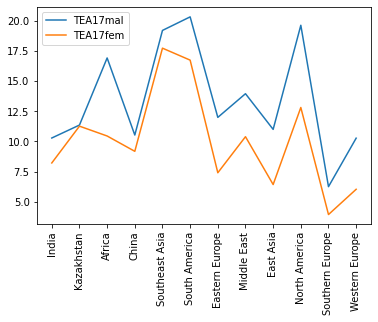

In [18]:
TEA_cols = ['TEA17mal', 'TEA17fem']
plt.plot(selected_groupby_region[TEA_cols])
plt.legend(TEA_cols)
plt.xticks(rotation=90)
plt.show()

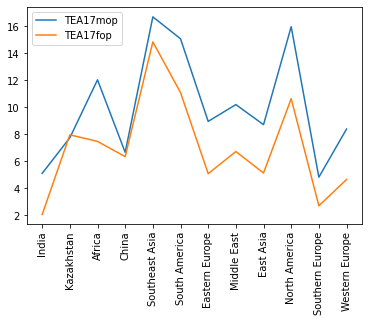

In [17]:
OP_cols = ['TEA17mop', 'TEA17fop']
plt.plot(selected_groupby_region[OP_cols])
plt.legend(OP_cols)
plt.xticks(rotation=90)
plt.show()

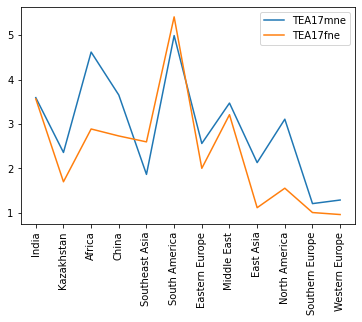

In [20]:
NE_cols = ['TEA17mne', 'TEA17fne']
plt.plot(selected_groupby_region[NE_cols])
plt.legend(NE_cols)
plt.xticks(rotation=90)
plt.show()